In [96]:
import numpy as np
import math
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [158]:
loadDataset = load_wine()
X_train, X_test, Y_train, Y_test = train_test_split(loadDataset['data'], loadDataset['target'], random_state = 2705)

In [178]:
loadLabel = np.genfromtxt("zip.combined.txt", delimiter=" ", usecols=(0))
loadData = np.genfromtxt("zip.combined.txt", delimiter=" ", usecols= range (1, 257))
X_train, X_test, Y_train, Y_test = train_test_split(loadData, loadLabel, random_state = 2705)

Choose only one of the two above cells. The first cell loads Wine and the second cell loads the zip data

In [159]:
svm = SVC()
score = cross_val_score(svm, X_train, Y_train)
print("Generalization accuracy: ", np.mean(score))

Generalization accuracy:  0.6692307692307692


In [ ]:
Zip Dataset: Generalization accuracy:  0.9704567964085712
Wine Dataset: Generalization accuracy:  0.6692307692307692

In [160]:
svm.fit(X_train, Y_train)
score = cross_val_score(svm, X_test, Y_test)
print("Test error rate: ", np.mean(1-score))

Test error rate:  0.3555555555555556


In [ ]:
Zip Dataset: Test error rate:  0.04688172043010752
Wine Dataset: Generalization accuracy:  Test error rate:  0.3555555555555556

Wine Dataset: The values generally hover around 0.7 Generalization and 0.3 test error rate.

zip Dataset: Accuracy is around 0.97 and test error rate is around 0.04

The test error rate and Generalization accuracy have a positive correlation, meaning as one increases the other normally increases as well.

In [109]:
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = Pipeline([("minmaxscaler", MinMaxScaler()), ("svc", SVC())])
#pipe = Pipeline([("StandardScaler", StandardScaler()), ("svc", SVC())])
#pipe = Pipeline([("RobustScaler", RobustScaler()), ("svc", SVC())])
#pipe = Pipeline([("Normalizer", Normalizer()), ("svc", SVC())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-2)
grid.fit(X_train, Y_train)
print("Best cross-validation accuracy: ", grid.best_score_)
print("Test set score: ", grid.score(X_test, Y_test))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy:  0.9851851851851852
Test set score:  0.9777777777777777
Best parameters:  {'svc__C': 1, 'svc__gamma': 1}


Wine Dataset:
Min Max Scaler: "Best cross-validation accuracy:  0.9925925925925926" "Test set score:  0.9555555555555556" "Best parameters:  {'svc__C': 1, 'svc__gamma': 0.1}" Test Error Rate: 0.044444444

Standard Scaler: "Best cross-validation accuracy:  1.0" "Test set score:  0.9777777777777777" "Best parameters:  {'svc__C': 1, 'svc__gamma': 0.1}" Test Error Rate: 0.0222222

RobustScaler: "Best cross-validation accuracy:  1.0" "Test set score:  0.9555555555555556" "Best parameters:  {'svc__C': 100, 'svc__gamma': 0.001}" Test Error Rate: 0.044444444

Normalizer: "Best cross-validation accuracy:  0.9472934472934472" "Test set score:  0.9777777777777777" "Best parameters:  {'svc__C': 100, 'svc__gamma': 100}" Test Error Rate: 0.022222222

zip Dataset:
Min Max Scaler: "Best cross-validation accuracy:  0.9713173200043196" "Test set score:  0.9698924731182795" "Best parameters:  {'svc__C': 10, 'svc__gamma': 0.01}" Test Error Rate: 0.0301076

StandardScaler: "Best cross-validation accuracy:  0.9657241737502764" "Test set score:  0.9690322580645161" "Best parameters:  {'svc__C': 10, 'svc__gamma': 0.001}" Test Error Rate: 0.030967742

RobustScaler: "Best cross-validation accuracy:  0.890712783408669" "Test set score:  0.9329032258064516" "Best parameters:  {'svc__C': 10, 'svc__gamma': 0.001}" Test Error Rate: 0.06709678

Normalizer: "Best cross-validation accuracy:  0.9746161480590138" "Test set score:  0.9759139784946237" "Best parameters:  {'svc__C': 10, 'svc__gamma': 1}" Test Error Rate: 0.02408603

Based on the results that i have found, i believe that the best scaler will be the Normalizer since in both datasets it had the lowest error rate, but on the corss validation it had the lowest on wine and highest on zip.

average P_value 0.5128505570614047


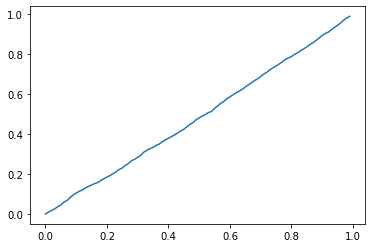

In [181]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle=True, random_state = 2705)

#print(decision_test)
#print(len(X_train))
ConformityArray = [0] *len(X_test)
for rest_index, fold_index in kf.split(X_train):
    X_rest, X_fold = X_train[rest_index], X_train[fold_index]
    y_rest, y_fold = Y_train[rest_index], Y_train[fold_index]
    svm.fit(X_rest, y_rest)
    decision_test = svm.decision_function(X_test)
    predicted = svm.predict(X_fold)
    #print(predicted)
    #print(predicted)
    #minimum = {}
    #for k in range(len(np.unique(y_fold))):
    #    minimum[k] = 0
    decision = svm.decision_function(X_fold)
    #print(decision)
    #print(minimum)
    for j in range(len(X_test)):  
        StrangeArray = []
        for i in range(len(decision)):
            #print(decision[i])
            #print(predicted[i], decision[i][int(predicted[i])])
            #(index(decision[i][int(predicted[i])]) == )
            StrangeArray.append(decision[i][int(predicted[i])])
            #minimum[predicted[i]] = decision[i][int(predicted[i])]
            #print (minimum)
        #print(StrangeArray)
        Strangeness = 0
        for n in range(len(StrangeArray)):
            if(max(decision_test[j]) > StrangeArray[n]):
                #print(max(decision_test[j]), "max")
                Strangeness += 1
        #print(len(np.unique(StrangeArray)))
        #print(Strangeness)
        ConformityArray[j] = ConformityArray[j] + Strangeness
        #print(ConformityArray)
#print(ConformityArray)

p_value = []
for i in ConformityArray:
    p_value.append((i +1)/(len(X_train)+1))
print("average P_value", np.mean(p_value))

    
%matplotlib inline
import matplotlib.pyplot as plt
eps = np.zeros(100) 
err = np.zeros(100) 
for k in range(100):
    eps[k] = k/100 
    err[k] = 0 
    for j in range(len(X_test)):
        if (p_value[j] <= eps[k]): 
            err[k] = err[k] + 1 
    err[k] = err[k] / len(X_test) 
plt.plot(eps,err)
    
    
#print(ConformityArray)
#ConformitySum = {}
#for k in range(len(np.unique(y_fold))):
#        ConformitySum[k] = 0
#for i in ConformityArray:
#    for j in range(len(i)):
#        i[j] = i[j] - 1
#        ConformitySum[j] = ConformitySum[j] + i[j]
#print(ConformityArray)
#print("\n")
#print(ConformitySum)
#for i in ConformitySum:
#    print("the p-value of ", i , " is: ", (ConformitySum[i] + 1)/(len(X_fold)+1))

    
    

        
#print(X_rest)
#print(X_fold)
#print(y_rest)
#print(y_fold)
    #svm.fit(X_rest, y_rest)
#compute the rank of the test sample in each fold, strangest sample gets 1
#subtract 1 from each rank
#sum values of the same rank
#divide the sum+1 by n+1 for the p-value
#repeat for all values

Using grid search caused it to take far too long so moved back to svm